Mock Mexico housing data saved ✅
Data loaded successfully ✅
First 5 rows:


,City,Single family,Condo or co-op,All homes,Household income,Unemployment,Population
0,Mexico City,450000,300000,380000,20000,3.5,9200000
1,Guadalajara,320000,250000,290000,18000,4.2,1500000
2,Monterrey,350000,270000,310000,19000,3.8,1300000
3,Cancun,400000,280000,340000,21000,3.1,900000
4,Puebla,300000,220000,270000,17000,4.0,1600000



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              10 non-null     object 
 1   Single family     10 non-null     int64  
 2   Condo or co-op    10 non-null     int64  
 3   All homes         10 non-null     int64  
 4   Household income  10 non-null     int64  
 5   Unemployment      10 non-null     float64
 6   Population        10 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 692.0+ bytes
None

Missing values:
City                0
Single family       0
Condo or co-op      0
All homes           0
Household income    0
Unemployment        0
Population          0
dtype: int64


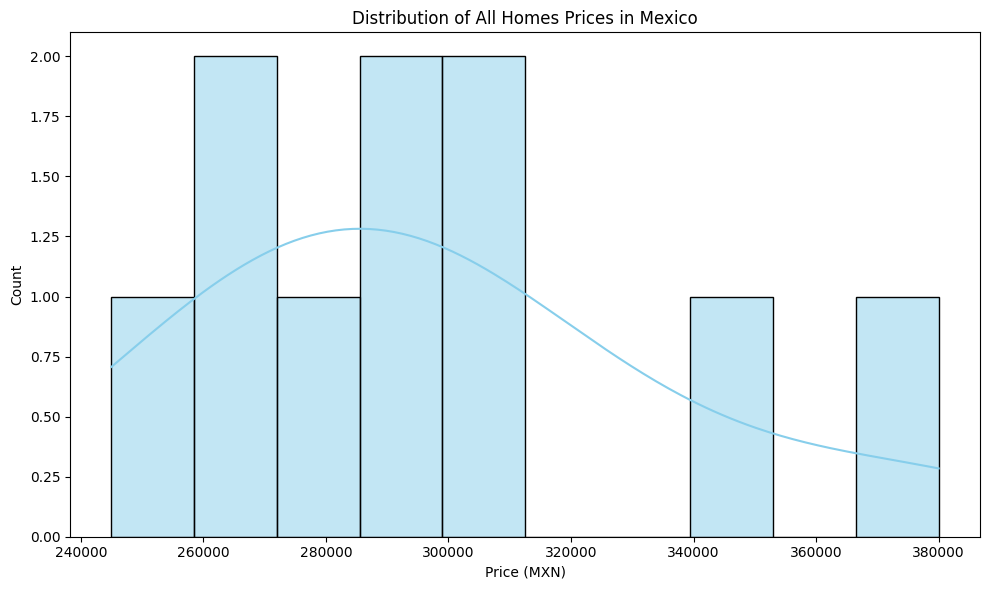

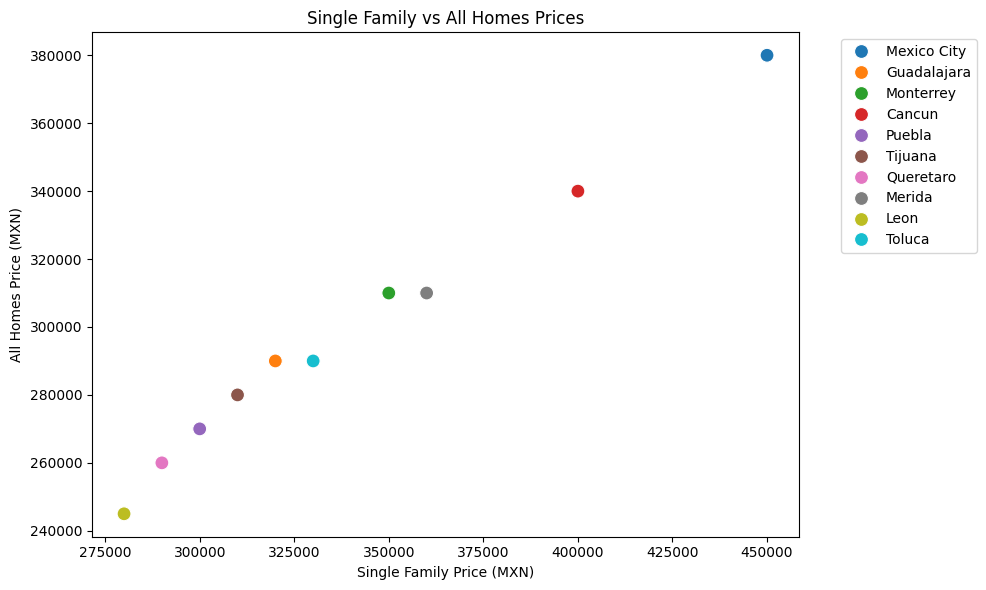

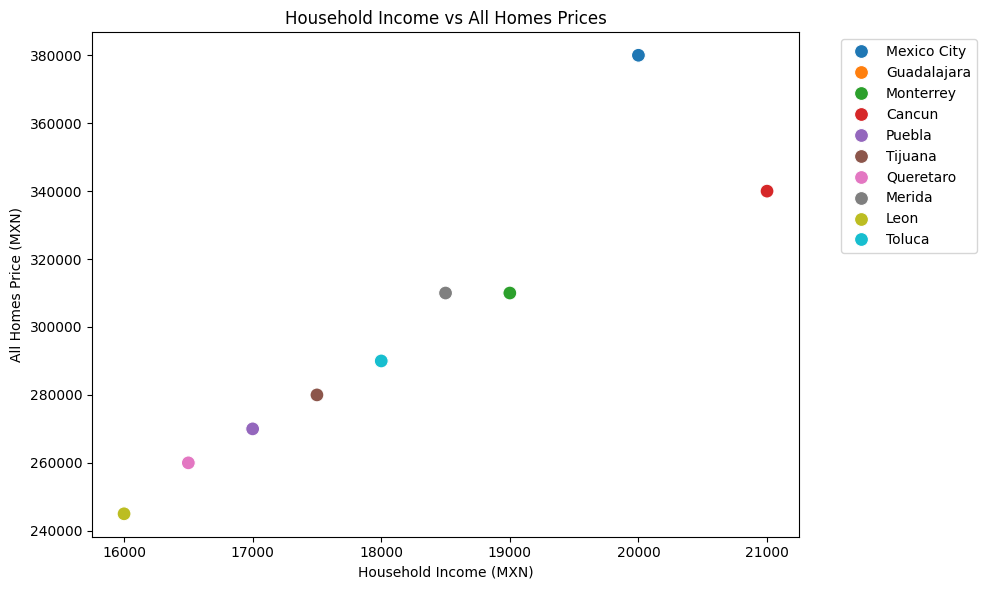

In [6]:
# Housing Analysis in Mexico
# Notebook path: notebooks/housing_analysis.ipynb

# 1️⃣ Imports
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2️⃣ Set folder paths
DATA_PATH = "../data/raw"
OUTPUT_PATH = "../outputs"

os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(OUTPUT_PATH, exist_ok=True)

# 3️⃣ Generate mock Mexico housing data (if file doesn't exist)
data_file = os.path.join(DATA_PATH, "housing_data.xlsx")

if not os.path.exists(data_file):
    data = {
        "City": ["Mexico City", "Guadalajara", "Monterrey", "Cancun", "Puebla", 
                 "Tijuana", "Queretaro", "Merida", "Leon", "Toluca"],
        "Single family": [450000, 320000, 350000, 400000, 300000, 310000, 290000, 360000, 280000, 330000],
        "Condo or co-op": [300000, 250000, 270000, 280000, 220000, 240000, 230000, 260000, 210000, 250000],
        "All homes": [380000, 290000, 310000, 340000, 270000, 280000, 260000, 310000, 245000, 290000],
        "Household income": [20000, 18000, 19000, 21000, 17000, 17500, 16500, 18500, 16000, 18000],
        "Unemployment": [3.5, 4.2, 3.8, 3.1, 4.0, 3.7, 3.6, 3.2, 4.1, 3.9],
        "Population": [9200000, 1500000, 1300000, 900000, 1600000, 1800000, 1000000, 900000, 1400000, 1200000]
    }
    df = pd.DataFrame(data)
    df.to_excel(data_file, index=False, engine='openpyxl')
    print("Mock Mexico housing data saved ✅")
else:
    print("Data file already exists ✅")

# 4️⃣ Load data
try:
    df = pd.read_excel(data_file, engine='openpyxl')
    print("Data loaded successfully ✅")
except FileNotFoundError:
    print(f"File not found: {data_file}")

# 5️⃣ Quick exploration
if 'df' in globals():
    print("First 5 rows:")
    display(df.head())
    
    print("\nData info:")
    print(df.info())
    
    print("\nMissing values:")
    print(df.isnull().sum())

# 6️⃣ Example visualizations
if 'df' in globals():
    # Distribution of All Homes prices
    plt.figure(figsize=(10,6))
    sns.histplot(df['All homes'], bins=10, kde=True, color='skyblue')
    plt.title("Distribution of All Homes Prices in Mexico")
    plt.xlabel("Price (MXN)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PATH, "price_distribution.png"))
    plt.show()
    
    # Single Family vs All Homes scatter
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='Single family', y='All homes', hue='City', s=100)
    plt.title("Single Family vs All Homes Prices")
    plt.xlabel("Single Family Price (MXN)")
    plt.ylabel("All Homes Price (MXN)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PATH, "scatter_single_all.png"))
    plt.show()
    
    # Household income vs All Homes price
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='Household income', y='All homes', hue='City', s=100)
    plt.title("Household Income vs All Homes Prices")
    plt.xlabel("Household Income (MXN)")
    plt.ylabel("All Homes Price (MXN)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PATH, "income_vs_price.png"))
    plt.show()

